In [22]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from kinetic_function import (fit_function,
                              read_csv_file, 
                              read_csv_file_v2,
                              single_track_analysis,
                              autocorrelation,
                              fit_autocorrelation,
                              fit_autocorrelation_v2,
                              check_continuous_time,
                              calculate_MSD,
                              generate_track
                             )

In [2]:
path_save = "D:/OneDrive - University of Warwick/06-KineticAnalysisMounia/4-Figures"

In [3]:
prot_aa_size = {
    "32xsuntag": 796,  #768/32=24 , left 28
    "linker": 4,
    "twist": 490,
    "ilp4": 134,
    "snail": 390,
    "very_long_prot":2000, 
}

In [9]:
prot_length = prot_aa_size["32xsuntag"]+prot_aa_size["snail"]
for i in range(100):
    x_global, y_global, y_start_prot = generate_track(prot_length = prot_length, 
                                                      suntag_appearance=24, 
                                                      fluo_max_ref=32, 
                                                      fluo_max=128, 
                                                      translation_rate=24, 
                                                      binding_rate=0.05,
                                                      step = 0.1,
                                                      length=82000)
    if i == 0:
        datas = pd.DataFrame({"FRAME":x_global,
                          "MEAN_INTENSITY_CH1":y_global,
                          "TRACK_ID" : i
                             })
    else:
        datas = pd.concat([datas, 
                           pd.DataFrame({"FRAME":x_global,
                          "MEAN_INTENSITY_CH1":y_global,
                          "TRACK_ID" : i
                             })], ignore_index=True)
datas.to_csv("datas_test_dt_length.csv")

In [6]:
# prot_length = prot_aa_size["32xsuntag"]+prot_aa_size["snail"]
# datas = pd.read_csv("datas_test_dt_length_very_long_track.csv")

In [10]:
first = True
for t in [1, 10, 600]:
    dt = t*0.1
    for length_track in [50, 100, 150, 200, 500, 1000, 5000, 10000]:
        
        for i in range(100):
            datas2 = datas[datas["TRACK_ID"]==i][::t][:length_track]
            if len(np.unique(datas2["MEAN_INTENSITY_CH1"])) > 1:
                (x, 
                y, 
                x_auto, 
                y_auto, 
                elongation_r, 
                translation_init_r,
                perr) = single_track_analysis(datas2, 
                                             i, 
                                             delta_t = dt,
                                             protein_size=prot_length,
                                             normalise_intensity=1,
                                             normalize_auto=True,
                                             mm=None,
                                             lowpass_=False,
                                             cutoff=100,
                                             rtol=1e-1,
                                             method="linear",
                                             force_analysis=True,
                                             first_dot=True)
                if first:
                    results = pd.DataFrame({"elongation_r":elongation_r, 
                                            "init_translation_r":translation_init_r, 
                                            "dt":dt,
                                            "long_track":datas2.shape[0],
                                           "id":i},
                                          index=[0])
                    first = False
                
                else:
                    results = pd.concat([results, 
                                    pd.DataFrame({"elongation_r":elongation_r, 
                                                  "init_translation_r":translation_init_r, 
                                                  "dt":dt, 
                                                  "long_track":datas2.shape[0],
                                                  "id":i}, index=[0])
                                    ], ignore_index=True)

to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear

In [12]:
for t in [1, 10, 600]:
    dt = t*0.1
    for length_track in [20000, 50000]:
        
        for i in range(100):
            datas2 = datas[datas["TRACK_ID"]==i][::t][:length_track]
            if len(np.unique(datas2["MEAN_INTENSITY_CH1"])) > 1:
                (x, 
                y, 
                x_auto, 
                y_auto, 
                elongation_r, 
                translation_init_r,
                perr) = single_track_analysis(datas2, 
                                             i, 
                                             delta_t = dt,
                                             protein_size=prot_length,
                                             normalise_intensity=1,
                                             normalize_auto=True,
                                             mm=None,
                                             lowpass_=False,
                                             cutoff=100,
                                             rtol=1e-1,
                                             method="linear",
                                             force_analysis=True,
                                             first_dot=True)
                if first:
                    results = pd.DataFrame({"elongation_r":elongation_r, 
                                            "init_translation_r":translation_init_r, 
                                            "dt":dt,
                                            "long_track":datas2.shape[0],
                                           "id":i},
                                          index=[0])
                    first = False
                
                else:
                    results = pd.concat([results, 
                                    pd.DataFrame({"elongation_r":elongation_r, 
                                                  "init_translation_r":translation_init_r, 
                                                  "dt":dt, 
                                                  "long_track":datas2.shape[0],
                                                  "id":i}, index=[0])
                                    ], ignore_index=True)

to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear

In [13]:
results.groupby(by=['dt', 'long_track'])[['elongation_r','init_translation_r']].mean()

elongation_r  init_translation_r
dt   long_track                                  
0.1  50            762.969753         3205.597801
     100           461.725114          879.610161
     150           339.343452         1096.414105
     200           317.114924            7.579292
     500            98.347841            0.790393
     1000           58.591048            0.246562
     5000           34.153386            0.070019
     10000          30.237188            0.056375
     20000          25.938943            0.048206
     50000          23.896888            0.044369
1.0  50             94.808672            0.742336
     100            56.245531            0.225638
     150            47.301848            0.146665
     200            40.413611            0.101142
     500            33.695050            0.069176
     1000           29.909148            0.055760
     5000           23.662034            0.043871
     10000          21.711509            0.040895
     20000          20.560638            0.039265
     50000          21.007825            0.039722
60.0 50              3.001880           -0.522964
     100             3.083026           -0.533238
     150             2.630555           -0.583920
     200             3.085655           -0.543399
     500             3.516746           -0.442235
     1000            2.892694           -0.543523
     1364            3.426744           -0.512761

In [33]:
results.groupby(by=['dt', 'long_track'])[['elongation_r','init_translation_r']].mean()

elongation_r  init_translation_r
dt   long_track                                  
0.1  50            999.960557          273.292419
     100           550.025468          144.339308
     150           403.453363           12.440333
     200           285.846511            6.778941
     500           155.746170            0.873056
     1000          117.989483            0.268693
     5000           29.415639            0.057255
1.0  50             93.162848            0.823144
     100            57.676224            0.255142
     150            43.653021            0.130786
     200            39.549471            0.095719
     500            28.959413            0.056455
     1000           25.155948            0.046723
     5000           22.587744            0.041551
60.0 50              2.742799           -0.563689
     97              3.165900           -0.563577

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


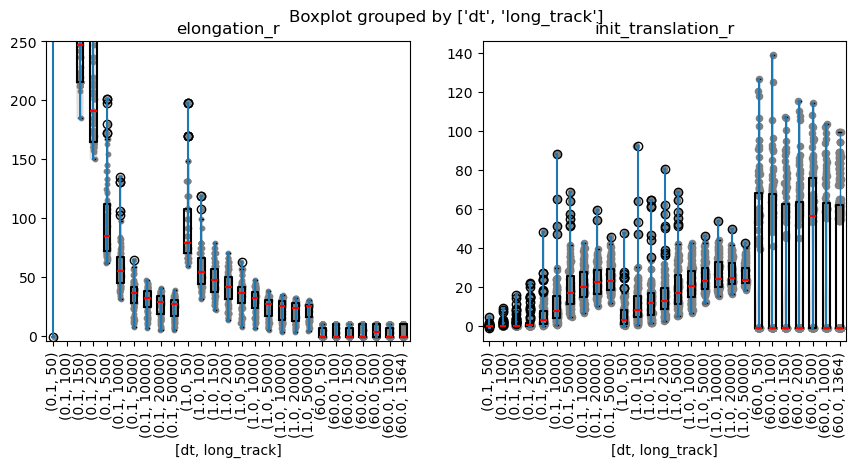

In [23]:
fig, ax = plt.subplots(1,2)
# results["init_translation_r"] = 1/results["init_translation_r"]
results.boxplot(['elongation_r'] , 
               by=['dt', 'long_track'], 
               grid=False, 
               ax = ax[0],
               rot=90, 
                boxprops=dict(linestyle='-', linewidth=1.5, color="black"),
               medianprops=dict(linestyle='-', linewidth=1.5, color="red"),
              )

50,100,150, 200, 500
violin = ax[0].violinplot(dataset = [
    results[(results.dt == 0.1) & (results.long_track == 50)]["elongation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 100)]["elongation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 150)]["elongation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 200)]["elongation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 500)]["elongation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 1000)]["elongation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 5000)]["elongation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 10000)]["elongation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 20000)]["elongation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 50000)]["elongation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 50)]["elongation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 100)]["elongation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 150)]["elongation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 200)]["elongation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 500)]["elongation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 1000)]["elongation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 5000)]["elongation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 10000)]["elongation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 20000)]["elongation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 50000)]["elongation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 50)]["elongation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 100)]["elongation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 150)]["elongation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 200)]["elongation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 500)]["elongation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 1000)]["elongation_r"].values,
    
    ])
for pc in violin["bodies"]:
    pc.set_facecolor("lightgrey")
    pc.set_edgecolor("lightgrey")
    pc.set_alpha(0.5)

results.boxplot(['init_translation_r'] , 
               by=['dt', "long_track"], 
               grid=False, 
               ax = ax[1],
               rot=90,
               boxprops=dict(linestyle='-', linewidth=1.5, color="black"),
               medianprops=dict(linestyle='-', linewidth=1.5, color="red"),
               )


violin = ax[1].violinplot(dataset = [
    results[(results.dt == 0.1) & (results.long_track == 50)]["init_translation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 100)]["init_translation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 150)]["init_translation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 200)]["init_translation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 500)]["init_translation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 1000)]["init_translation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 5000)]["init_translation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 10000)]["init_translation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 20000)]["init_translation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 50000)]["init_translation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 50)]["init_translation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 100)]["init_translation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 150)]["init_translation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 200)]["init_translation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 500)]["init_translation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 1000)]["init_translation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 5000)]["init_translation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 10000)]["init_translation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 20000)]["init_translation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 50000)]["init_translation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 50)]["init_translation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 100)]["init_translation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 150)]["init_translation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 200)]["init_translation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 500)]["init_translation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 1000)]["init_translation_r"].values,
    
                           ])
for pc in violin["bodies"]:
    pc.set_facecolor("lightgrey")
    pc.set_edgecolor("lightgrey")
    pc.set_alpha(0.5)

group = ['dt', "long_track"]
column = 'elongation_r'
grouped = results.groupby(group)
names, vals, xs = [], [] ,[]
for i, (name, subdf) in enumerate(grouped):
    names.append(name)
    vals.append(subdf[column].tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))
clevels = np.linspace(0., 1., len(grouped))
for x, val, clevel in zip(xs, vals, clevels):
    ax[0].scatter(x, val, c='grey', alpha=1, s=10)
    
group = ['dt', "long_track"]
column = 'init_translation_r'
grouped = results.groupby(group)
names, vals, xs = [], [] ,[]
for i, (name, subdf) in enumerate(grouped):
    names.append(name)
    vals.append(subdf[column].tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))
clevels = np.linspace(0., 1., len(grouped))
for x, val, clevel in zip(xs, vals, clevels):
    ax[1].scatter(x, val, c='grey', alpha=1, s=20)
    
ax[0].set_ylim(-5,250)
# ax[1].set_ylim(0,250)
fig.set_size_inches((10,4))
fig.savefig(os.path.join(path_save, "results_delta_t_length_boxplot.eps"), dpi=300)

,elongation_r,init_translation_r,dt,id
3,14.552147,0.032119,0.1,3
103,14.641975,0.031909,1.0,3
203,15.205128,0.031964,3.0,3
303,8.471429,0.023600,10.0,3
403,6.588889,0.019203,30.0,3
503,6.588889,0.013744,60.0,3


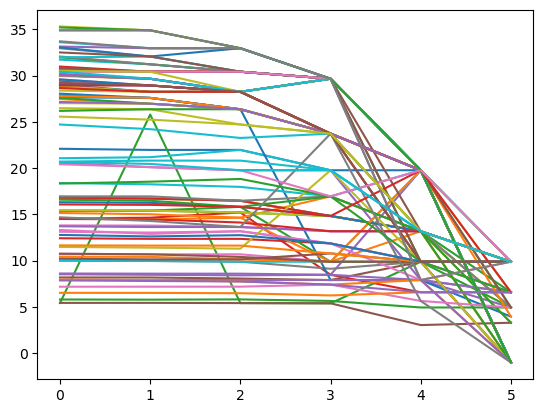

In [16]:
fig, ax = plt.subplots()
for i in range(100):
    ax.plot(range(6), results[i::100]["elongation_r"])

In [17]:
results

,elongation_r,init_translation_r,dt,id
0,22.085661,0.030738,0.1,0
1,29.949495,0.056837,0.1,1
2,5.427918,0.025032,0.1,2
3,14.552147,0.032119,0.1,3
4,20.554593,0.034079,0.1,4
...,...,...,...,...
595,9.883333,0.014489,60.0,95
596,9.883333,0.015652,60.0,96
597,9.883333,0.020909,60.0,97
598,9.883333,0.019611,60.0,98


In [14]:
datas[datas["TRACK_ID"]==0][::600]

,FRAME,MEAN_INTENSITY_CH1,TRACK_ID
0,0.0,0.0,0
600,60.0,199.2,0
1200,120.0,255.6,0
1800,180.0,256.0,0
2400,240.0,250.4,0
...,...,...,...
115200,11520.0,131.2,0
115800,11580.0,381.2,0
116400,11640.0,128.0,0
117000,11700.0,0.0,0
